### Optimism Retro Funding 5: Synthetic Voter Data

This notebook creates synthetic ballots for voters.

Here is a sample ballot:

```
{
    "budget": 5000000,
	"category_allocations": {
      "eth_core": 33.34241054408801,
      "op_tooling": 18.294210554980666,
      "op_rnd": 48.363378900931316
    },
    "project_allocations": {
      "0x3da04dddd2ec5c1d054febf688308716e7564b421e01e4e82eda6f9bd24f8b41": 0.0,
      "0xee23d90c184df2bbfc40f6af22f1bd200562167afcf738cef6709ef0d694b1f0": 4.589376708619598,
      "0x340ac6479781611598d6666c9812e36821b25e350a43f3280346bd4319299f29": 2.3579766029216986,
      "0xa2285c1bf9acc53c3542479a49b410436671e9ad77f347d3ed0e6fbda48f76a7": 5.962796949114943,
      "0x506062fe9c76b52ccc9c97fb84cfed0f5d78f5e68c9552ce448771ea030c49fa": 0.0,
      "0x5df83d3e904488ef065f530fde1a74718b56a7476ebff1edc3d97d2d56218537": 3.8273079005917774,
      "0x11a9c93662d17cc9aff4c49b7d6f7a37980b57f9e5ee3caac92c01cc08d009ec": 6.2374809972140115,
      "0xcbe356bd8ba0453dd10bd8c4845e8a150512ceceaba4b9017a3b8bad53561249": 3.0574096185088764,
      "0xf8d51c3ab4edd1a345c92b7cb6ddda3650d80ccabd980c9d1dbc23cf285ea684": 6.290329947085804,
      "0xfd95f73ebcfc9cfa195c3559ba8fcf83c2ab049f822633ac5cf52d7f9e567c43": 4.638310921463851,
      "0x76eb97b3422aec4b37be0face37ebf1aa49aadd088a36dd88f7e401ccd48b472": 4.392987401071333,
      "0x971330be9f27650cf806af55ec469ba3206945a13c13f0c4f153652b93b32bb2": 4.286637045156492,
      "0x28c0b88019ed18ed2aa133ee992e3adbf54f21c704c410114f12c51b1ace8874": 3.4345292854952465,
      "0x089050b459e6164a46c2d09130b064eec2c90e2759891599bb76d52a987fac55": 5.312298146372017,
      "0xf7f9160a88aee57a4618f8c6ccac66f27bd243e8ddab380dbeb6130da4e6a4eb": 2.6254836331369438,
      "0x05cc0bbfa0ad4835e59633470455859fd70fce52420dc83b91fb26f31bb2ee6e": 0.0,
      "0xf597ab3d3ec935e8abe19aa705f56ec83dbb7f027bc0f334d1381ae4075556d8": 5.0891581358022275,
      "0x45b03471a679da490ce0943f83b21d20c109fafbc9e701058fca96e974a13d7d": 2.1628922077159465,
      "0x9ddc44d1352586f3cb3d45e609d9aab07704be33a57c198c9f57a4f3f52f92a9": 6.447571884358668,
      "0x415ac60b30614ceccf557d04dd0a075978ae1e58cbf23dd318295726ed68afb4": null,
      "0xa8be3453b6bd84219a29c8a86db0e6e2ffa41d2db02fd778d0c2c5bf1b0d827a": 0.8377537238935974,
      "0x1892db8b3d09fc8c1e2427d0f743cdb877afe035ab0233741d8da2756c702eee": 1.1013460170813025,
      "0x1628fdb2007be4bbab8b1fa5296e0f9d8eff9fcff9999148920f08a21063d4f8": 6.005859056417885,
      "0x30e8df5ec80665da826819d93c7ab656d5df0b4a51144e026c3dd69d57e8efd6": 1.9788995674215584,
      "0x0113b22abd399beeb12c290ab88d4e667628e8ec21734aff6f3fb0a633f7d072": 2.2881637925972322,
      "0x65f07716e69d6a4d42632e19a66423ccf9b77012c2ff2fc348e7345f1fdcfa43": null,
      "0x3f93d41b1d62cb5e9543da3bcf0ef7d96c835f9dce7ad1ab83674f6b5efbbf27": 2.4062583595946943,
      "0x683556cb0d387d17b5e64dcdb9c72026f2de33e6b62ada05a8b7501229fae5d8": 6.476279955893962,
      "0x31e2fb6bcbba1c3e5b463a393f45cc54fcb6d3b2fadabbe3f28873d9fd4accea": 0.0,
      "0x88c0bf15aa16690c7cc1b433597e7a40b643a811c3a5e8c183f8721a930e6b3b": 0.6772495057644502,
      "0xa9809e2f20811ac32c10f6f9541b938ef1eb586e5d75bc012fc373d432c08d2c": 3.516086306902334,
      "0xc9b275333e4973360694c36a9bc7ad0efb10cf8b988bbd2d427017e02fdeb07b": 3.9995563298035455
    }
}
```

In [1]:
from collections import defaultdict
import json
import pandas as pd
import numpy as np
import random
import secrets

In [2]:
# Round parameters (don't edit)
CATEGORIES = ['eth_core', 'op_tooling', 'op_rnd']
NUM_CATEGORIES = len(CATEGORIES)
MAX_BUDGET = 8_000_000
MIN_BUDGET = 2_000_000

# Simulation parameters (please edit)
NUM_PROJECTS = 120
NUM_VOTERS = 100
MAX_COI_PROJECTS = 10

<Axes: >

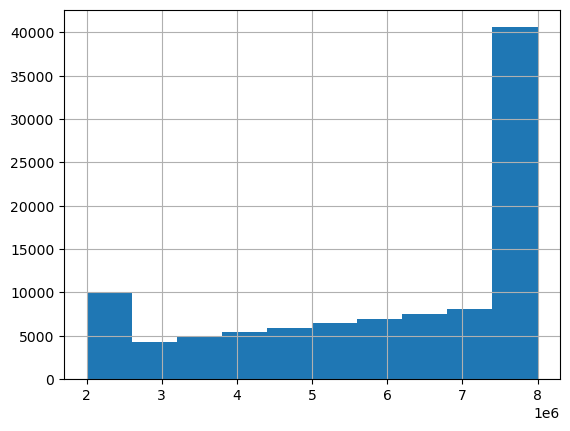

In [3]:
def randomize_budget():

    max_budget = MAX_BUDGET + MIN_BUDGET
    min_budget = 0
    random_val = 1/np.random.pareto(1.69)
    scaled_val = (random_val / (random_val + 1)) * (max_budget - min_budget) + min_budget
    round_val = int(round(scaled_val / 100_000) * 100_000)
    return min(max(round_val, MIN_BUDGET), MAX_BUDGET)

pd.Series([randomize_budget() for _ in range(100_000)]).hist()

<Axes: >

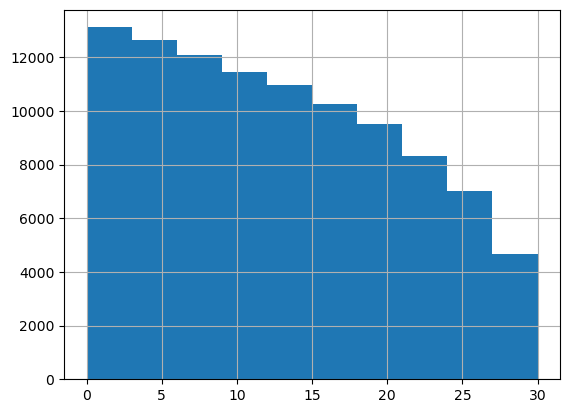

In [4]:
def randomize_project_allocation():

    max_percent = 30
    min_percent = 0
    random_val = np.random.pareto(1.33)
    scaled_val = (random_val / (random_val + 1)) * (max_percent - min_percent) + min_percent
    return scaled_val

pd.Series([randomize_project_allocation() for _ in range(100_000)]).hist()

In [5]:
# Initialize categories and projects

# Randomly generate project UIDs
projects = [
    f"0x{secrets.token_hex(32)}"
    for _ in range(NUM_PROJECTS)
]

# Randomly allocate projects to categories
projects_by_category = defaultdict(list)
for project in projects:
    category = random.choice(CATEGORIES)
    projects_by_category[category].append(project)

# Test
projects_by_category['op_tooling'][:5]

['0x8092297518b0478ecbe1b63d9a91511a806fad548c54dc6e59d5f1373a8c3d8e',
 '0x1ad58a2b1942103c42c5e6e8072d4fb8a5bf41efef73c27d06cf4c565e99a182',
 '0x8d844ef42bc6de0354fd9b37068d84731ea6b41859279c452f4cb58caf816a43',
 '0x1ff98de58299ba4a3046bda22ea180ba40269ddbbea0eae6bb8d638842c822e0',
 '0x6e5372329b19113bc03056dd37dff314db25043665cb8efc2a3d08d206bba979']

In [6]:
# Generate voter ballots
def generate_ballot():

    # Generate random category for the voter
    assigned_category = random.sample(CATEGORIES, 1)[0]

    # Generate random COI list for each voter (for simplicity, random projects)
    coi_projects = list(random.sample(projects, random.randint(0, MAX_COI_PROJECTS)))

    # Create a random threshold (up to 5%) for the voter to "zero" vote projects they don't like
    zero_thresh = random.randint(0, 500)/100 

    # Determine total budget allocation
    total_budget = randomize_budget()
    
    #  Determine category allocations
    category_allocations = {category: random.randint(0, 10000)/100. for category in CATEGORIES}
    total = sum(category_allocations.values())
    category_allocations = {k: (v * 100 / total) for k, v in category_allocations.items()}

    # Determine project allocations within a category
    for category, proj_list in projects_by_category.items():
        if category != assigned_category:
            continue

        project_allocations = defaultdict(list)
        for project in proj_list:            
            alloc = randomize_project_allocation()
            if alloc < zero_thresh or project in coi_projects:
                alloc = 0
            project_allocations[project] = alloc
        
        total = sum(project_allocations.values())
        project_allocations = {
            k: v * 100 / total if k not in coi_projects else None
            for k, v in project_allocations.items()
        }

    return {
        "voter_id": f"0x{secrets.token_hex(20)}",
        "budget": total_budget,
        "category_assignment": assigned_category,
        "category_allocations": category_allocations,
        "project_allocations": project_allocations
    }

# Generate all voter ballots
voter_ballots = [generate_ballot() for _ in range(NUM_VOTERS)]

In [7]:
voter_ballots[0]

{'voter_id': '0x07f510c76c89fced100dd92eb8b99e1b1f77fc7b',
 'budget': 8000000,
 'category_assignment': 'op_rnd',
 'category_allocations': {'eth_core': 0.21151870429685143,
  'op_tooling': 56.415060131745946,
  'op_rnd': 43.37342116395722},
 'project_allocations': {'0x1ae1fe0fa43f7bee9f20c48dc61177b07064e8a9b247e4758c93d97c3d0b4519': 1.3670904835327025,
  '0x80a70533418228c37f1900116cb228e6649ecb5df4ebec31e6a295e0e910e7fc': 4.419022805817918,
  '0x394dbaab107f95b8b0a370d8b632d146175ce7f9f07db9fb950bd7e9f1009b3f': 1.8119408186430452,
  '0xe0fbf4a8570cf4f3e25d644c0f4cae22c3ca0bd2b47691fbf41ad32064bdbe83': 4.2092096628070825,
  '0x5166d53de20a34f5b2ae2660f0f04e89254ffd20d42d75096b5c7de75fb7f57b': 2.687889648061199,
  '0x752979ede0641acd7ae184a2d9ff24034fa4d53ad195acf2122dd441ce8fc730': 0.0,
  '0xe45c979225327680ba6e2058b397eb1c935fb51b918181fd070e255b08c7946f': 2.005698754979129,
  '0x337b64d7fd7a15f46727e30c1d9065a08df513e440a02ef8261c4a35d7f75a41': 3.8857647688938495,
  '0x3ad2d9861c1cea

In [8]:
with open("data/rf5_synthetic_ballots.json", "w") as f:
    json.dump(voter_ballots, f, indent=2)